<a href="https://colab.research.google.com/github/RizqiRHuda/PVCK_Semester5/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL 10 – GLOBAL THRESHOLDING**

Nama         : Rizqi Rohmatul Huda

Kelas        : TI-3C

Nomor Absen  : 21

NIM          : 2141720264

### **D. TUGAS PRAKTIKUM**

**Mengakses file dari google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [5]:
pip install pytesseract

In [4]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image


3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

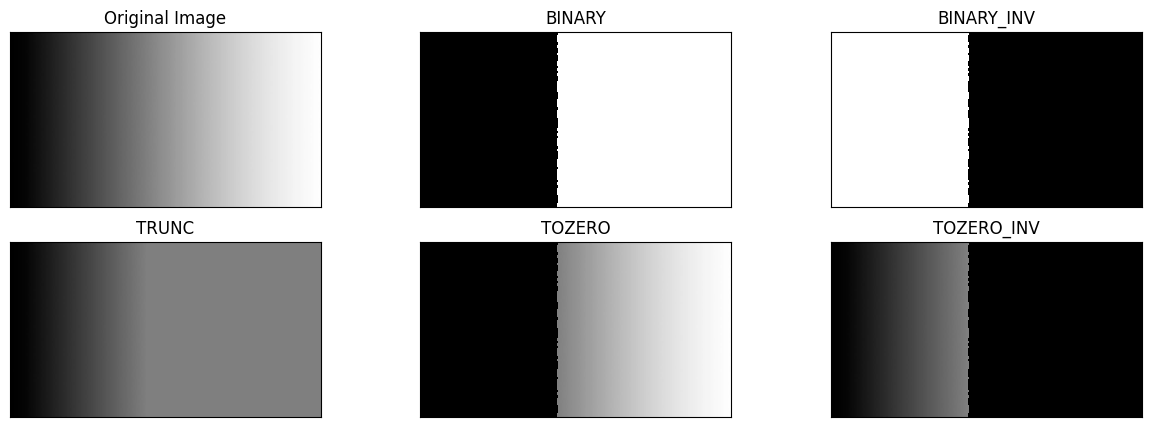

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/img_python/content/image_thres/gradient.jpg')
img = cv.imread(filename)
thresh = 127

ret, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, thresh, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi Global Thresholding
def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary

# Fungsi Otsu's Thresholding
def otsu_thresholding(image):
    # Normalisasi histogram
    hist = np.histogram(image, bins=256, range=(0, 256))[0].astype(float)
    hist /= hist.sum()

    maximum = 0
    threshold = 0
    sum_b = 0
    sum_f = np.dot(np.arange(256), hist)
    for t in range(256):
        w_b = np.sum(hist[:t])
        w_f = 1 - w_b
        if w_b == 0 or w_f == 0:
            continue
        sum_b += t * hist[t]
        m_b = sum_b / w_b
        m_f = (sum_f - sum_b) / w_f
        between_class_variance = w_b * w_f * (m_b - m_f) ** 2
        if between_class_variance > maximum:
            maximum = between_class_variance
            threshold = t

    return threshold


Nilai threshold dari Otsu's Thresholding: 171


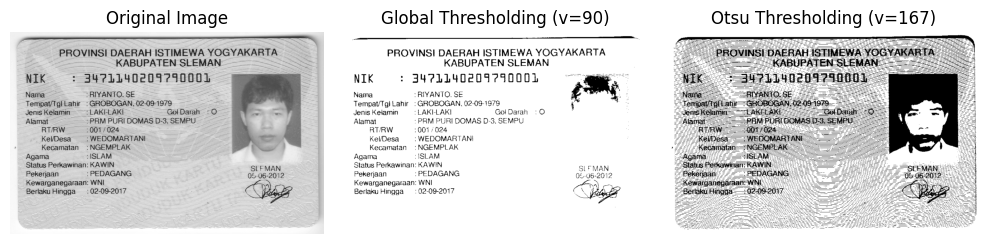

In [13]:

# Path file gambar
image_path = '/content/drive/MyDrive/img_python/content/img_week10/Riyanto.png'

# Baca gambar dari path
image = np.array(Image.open(image_path).convert("L"))

# Global Thresholding dengan v=90
global_threshold = global_thresholding(image, 90)

# Otsu's Thresholding
otsu_threshold = otsu_thresholding(image)

# Tampilkan gambar dan hasil thresholding
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_threshold, cmap='gray')
plt.title('Global Thresholding (v=90)')
plt.axis('off')

plt.subplot(1, 3, 3)
otsu_binary = np.zeros_like(image)
otsu_binary[image > otsu_threshold] = 255
plt.imshow(otsu_binary, cmap='gray')
plt.title('Otsu Thresholding (v=167)')
plt.axis('off')

# Otsu's Thresholding
otsu_threshold = otsu_thresholding(image)
print("Nilai threshold dari Otsu's Thresholding:", otsu_threshold)


plt.tight_layout()
plt.show()